# Do Americans approve the way that Trump is handling Covid-19? 

FiveThirtyEight recently shared a dataset concerning the approval/disapproval of Americans for the way that Donald Trump's handling Covid-19. One question is asked to participants and took place on internet by several pollster:

**"Do you approve or disapprove the that Donald Trump is handling Covid-19?"**

In this study, we will try to show whether Americans approve or disapprove the actions that Donald Trump has taken **over time**.

You can check the dataset by clicking this link: https://github.com/fivethirtyeight/covid-19-polls/blob/master/covid_approval_polls.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
approval_original=pd.read_csv("covid_approval_polls.csv")
approval=approval_original.copy()

In [3]:
#Check out the overall information of this data set

approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start_date   343 non-null    object 
 1   end_date     343 non-null    object 
 2   pollster     343 non-null    object 
 3   sponsor      173 non-null    object 
 4   sample_size  342 non-null    float64
 5   population   343 non-null    object 
 6   party        343 non-null    object 
 7   subject      343 non-null    object 
 8   tracking     343 non-null    bool   
 9   text         341 non-null    object 
 10  approve      343 non-null    float64
 11  disapprove   343 non-null    float64
 12  url          343 non-null    object 
dtypes: bool(1), float64(3), object(9)
memory usage: 32.6+ KB


In [4]:
approval.head(3)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-04-03,2020-04-05,Morning Consult,NaN,2200.0,a,all,Trump,False,Do you approve or disapprove of the job each o...,49.0,45.0,https://morningconsult.com/wp-content/uploads/...
1,2020-04-03,2020-04-05,Morning Consult,NaN,684.0,a,R,Trump,False,Do you approve or disapprove of the job each o...,88.0,11.0,https://morningconsult.com/wp-content/uploads/...
2,2020-04-03,2020-04-05,Morning Consult,NaN,823.0,a,D,Trump,False,Do you approve or disapprove of the job each o...,20.0,75.0,https://morningconsult.com/wp-content/uploads/...


In [5]:
approval.tail(3)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
340,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
341,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
342,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...


For this analysis, we will not need all of the columns inside the dataset so we will remove them:

In [6]:
cols=["url","sponsor","subject","text","population","start_date"]
approval=approval.drop(cols,axis=1)
approval.head(3)

,end_date,pollster,sample_size,party,tracking,approve,disapprove
0,2020-04-05,Morning Consult,2200.0,all,False,49.0,45.0
1,2020-04-05,Morning Consult,684.0,R,False,88.0,11.0
2,2020-04-05,Morning Consult,823.0,D,False,20.0,75.0


In the column descriptions, FiveThirtyEight mentions that **tracking column displays <font color=blue>True</font> if the poll is a tracking poll, meaning that the pollster is releasing data with overlapping samples.**

Now let's check out the numbers of how many polls were tracked:

In [7]:
approval["tracking"].value_counts()

False    303
True      40
Name: tracking, dtype: int64

Approximately 12% of the entries in this dataset have overlapping samples and that's not very pleasant. Let's check out these entries:

In [8]:
approval[approval["tracking"]==True]

,end_date,pollster,sample_size,party,tracking,approve,disapprove
4,2020-04-03,Global Strategy Group/GBAO,997.00,all,True,47.0,49.0
5,2020-04-03,Global Strategy Group/GBAO,358.92,R,True,85.0,14.0
6,2020-04-03,Global Strategy Group/GBAO,418.74,D,True,18.0,79.0
7,2020-04-03,Global Strategy Group/GBAO,219.34,I,True,37.0,47.0
12,2020-04-02,Global Strategy Group/GBAO,1008.00,all,True,48.0,49.0
13,2020-04-02,Global Strategy Group/GBAO,362.88,R,True,88.0,12.0
14,2020-04-02,Global Strategy Group/GBAO,423.36,D,True,16.0,81.0
15,2020-04-02,Global Strategy Group/GBAO,221.76,I,True,44.0,43.0
26,2020-04-01,Global Strategy Group/GBAO,1010.00,all,True,48.0,48.0
27,2020-04-01,Global Strategy Group/GBAO,363.60,R,True,86.0,12.0


In [9]:
approval=approval.groupby("tracking")
approval=approval.get_group(False)
approval.head()

,end_date,pollster,sample_size,party,tracking,approve,disapprove
0,2020-04-05,Morning Consult,2200.0,all,False,49.0,45.0
1,2020-04-05,Morning Consult,684.0,R,False,88.0,11.0
2,2020-04-05,Morning Consult,823.0,D,False,20.0,75.0
3,2020-04-05,Morning Consult,693.0,I,False,44.0,43.0
8,2020-04-02,Ipsos (online),559.0,all,False,47.0,52.0


In [10]:
approval["tracking"].value_counts()

False    303
Name: tracking, dtype: int64

#### Date

Our end goal is to analyze the approvals & disapproval ratios of Americans **over time**. The reason that makes time periods **important** is that people from all around the world weren't aware of the seriousness and consequences of this virus. The more they got informed, the more different they approached to it. So it's important to see whether Americans' approval remained still or changed in time towards Donald Trump's actions against Covid-19.

In this analysis we take **"end_date" (the date that the poll is closed)** as the date points and we will observe the changes across these points.

In [11]:
approval["end_date"]=pd.to_datetime(approval["end_date"])

## Democrats, Republicans or All?

**Party** column in the data set has four components: **all**, **D** for democrats, **R** for Republicans and **I** for independents. We will start with **all**, and then continue with the others.

In [12]:
approval_all=approval[approval["party"]=="all"]
approval_rep=approval[approval["party"]=="R"]
approval_demo=approval[approval["party"]=="D"]
approval_ind=approval[approval["party"]=="I"]

In [13]:
#start with approval_all
approval_all["pollster"].value_counts().head(3)

YouGov             20
Morning Consult    17
Ipsos (online)      8
Name: pollster, dtype: int64

From now on, we will reach our end goal by analising the results of these top three pollsters.

In [14]:
approval_all_you=approval_all[approval_all["pollster"]=="YouGov"]
approval_all_mor=approval_all[approval_all["pollster"]=="Morning Consult"]
approval_all_ipsos=approval_all[approval_all["pollster"]=="Ipsos (online)"]

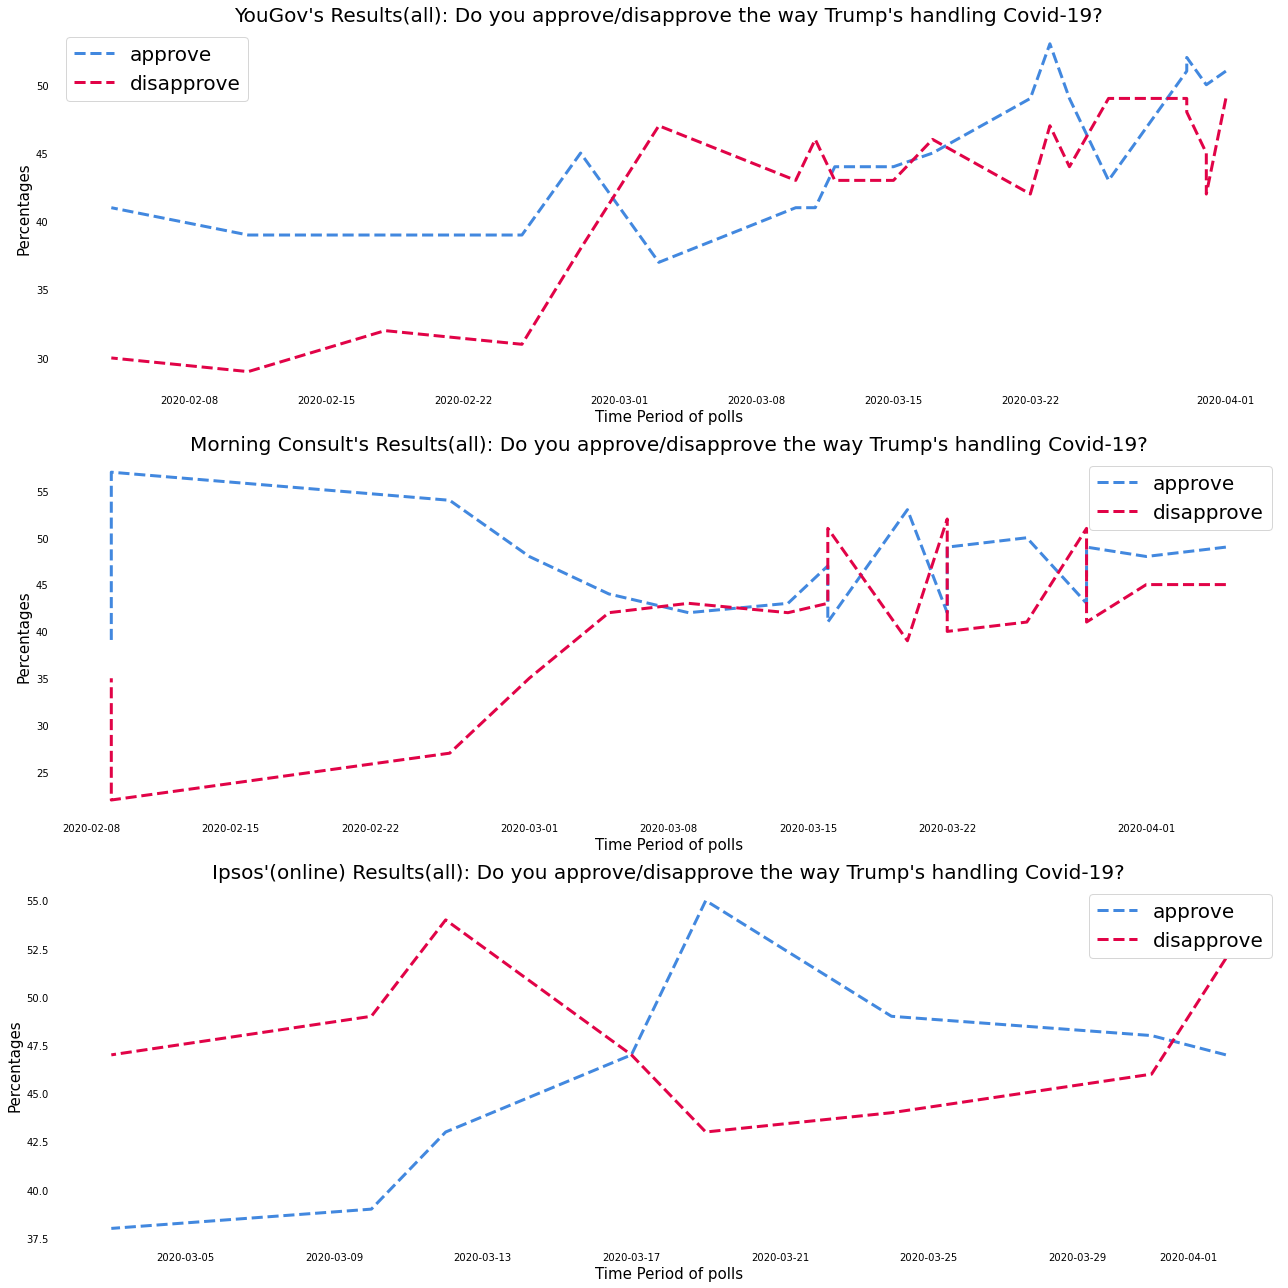

In [15]:
fig=plt.figure(figsize=(18,18))

ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

ax1.plot(approval_all_you["end_date"],approval_all_you["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax1.plot(approval_all_you["end_date"],approval_all_you["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax1.set_title("YouGov's Results(all): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax1.set_xlabel("Time Period of polls",fontsize=15)
ax1.set_ylabel("Percentages",fontsize=15)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.tick_params(bottom=False,left=False)
ax1.legend(prop={"size":20})

ax2.plot(approval_all_mor["end_date"],approval_all_mor["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax2.plot(approval_all_mor["end_date"],approval_all_mor["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax2.set_title("Morning Consult's Results(all): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax2.set_xlabel("Time Period of polls",fontsize=15)
ax2.set_ylabel("Percentages",fontsize=15)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.tick_params(bottom=False,left=False)
ax2.legend(prop={"size":20})

ax3.plot(approval_all_ipsos["end_date"],approval_all_ipsos["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax3.plot(approval_all_ipsos["end_date"],approval_all_ipsos["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax3.set_title("Ipsos'(online) Results(all): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax3.set_xlabel("Time Period of polls",fontsize=15)
ax3.set_ylabel("Percentages",fontsize=15)
ax3.spines["right"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.tick_params(bottom=False,left=False)
ax3.legend(prop={"size":20})

fig.tight_layout()
plt.show()

According to **YouGov's results**, the graphic indicates that at the early stages of this virus' spread people were in favour of Trump's manner of handling the issue but still there were also others that were in disagreement. Over time, the graphic shows us that a significant increase occurred in the proportion of people in disapproval of Trump's handling manner. Not as grand as disapproval's ratio, but there's also an increase in the approval ratio. In this sense, **results of Morning Consult are complying with YouGov's.** In both polls, the approval ratio is slightly higher than the disapproval ratio

**The result of Ipsos' poll** starts a bit different due to its base date - the graphic starts from March. And we see that **disapproval ratio is higher than the approval**.


### Democrats

In [16]:
approval_d_you=approval_demo[approval_demo["pollster"]=="YouGov"]
approval_d_mor=approval_demo[approval_demo["pollster"]=="Morning Consult"]
approval_d_ipsos=approval_demo[approval_demo["pollster"]=="Ipsos (online)"]

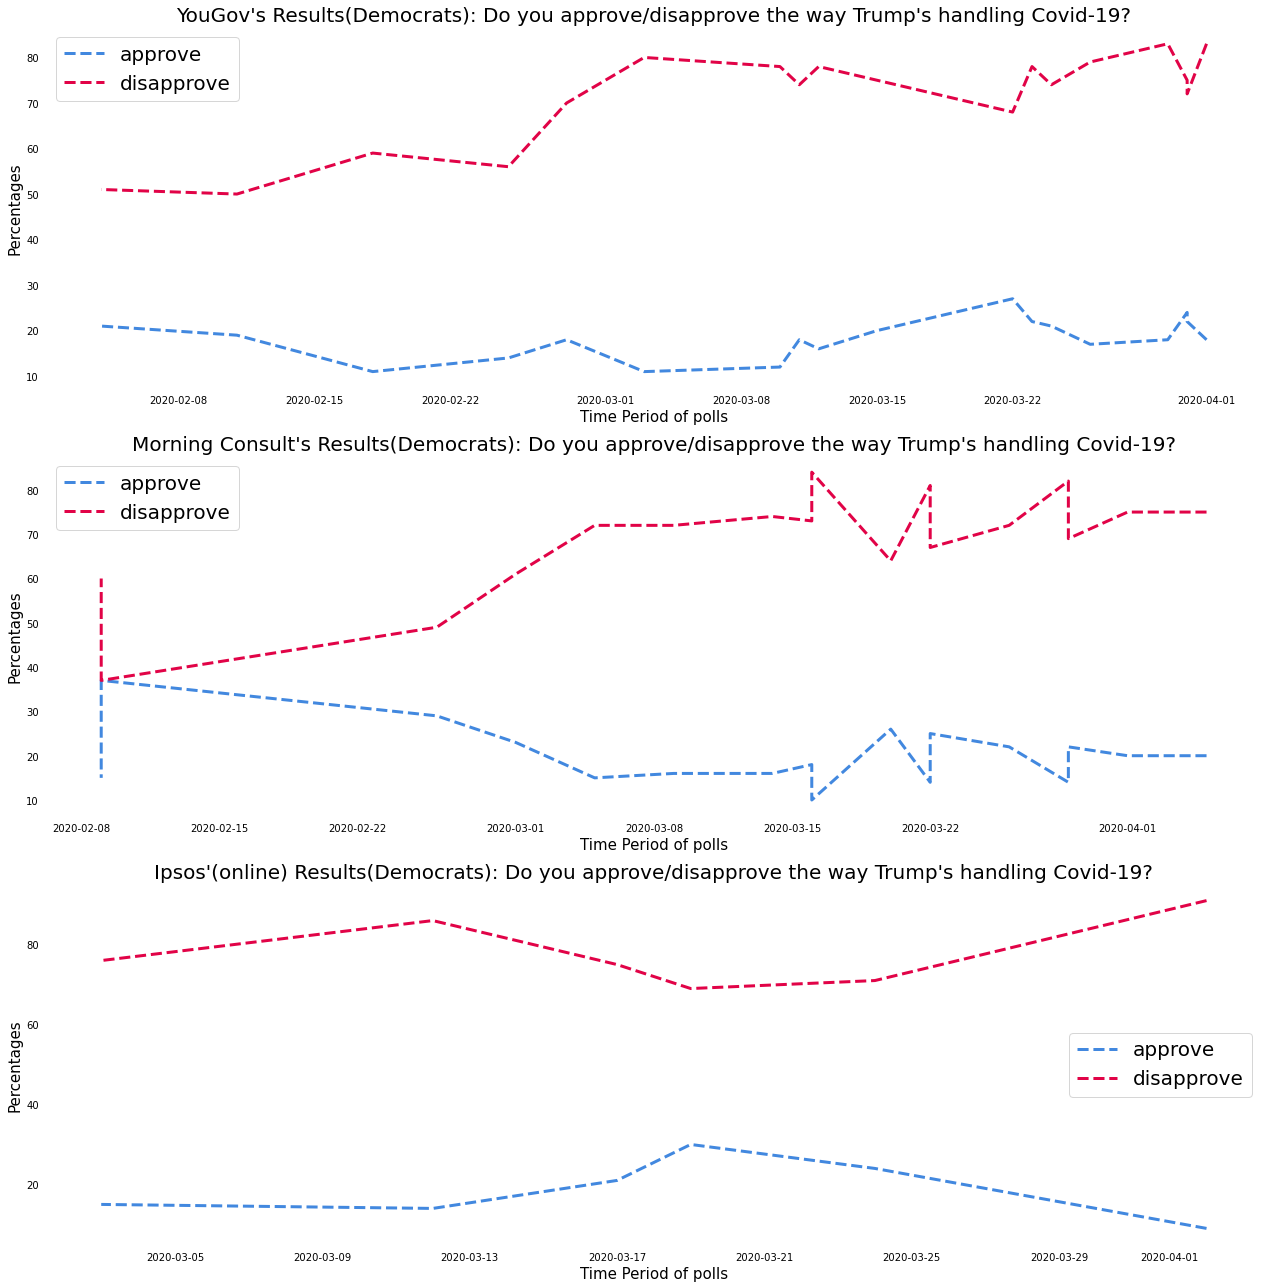

In [17]:
fig=plt.figure(figsize=(18,18))

ax4=fig.add_subplot(3,1,1)
ax5=fig.add_subplot(3,1,2)
ax6=fig.add_subplot(3,1,3)

ax4.plot(approval_d_you["end_date"],approval_d_you["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax4.plot(approval_d_you["end_date"],approval_d_you["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax4.set_title("YouGov's Results(Democrats): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax4.set_xlabel("Time Period of polls",fontsize=15)
ax4.set_ylabel("Percentages",fontsize=15)
ax4.spines["right"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(bottom=False,left=False)
ax4.legend(prop={"size":20})

ax5.plot(approval_d_mor["end_date"],approval_d_mor["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax5.plot(approval_d_mor["end_date"],approval_d_mor["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax5.set_title("Morning Consult's Results(Democrats): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax5.set_xlabel("Time Period of polls",fontsize=15)
ax5.set_ylabel("Percentages",fontsize=15)
ax5.spines["right"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["top"].set_visible(False)
ax5.spines["bottom"].set_visible(False)
ax5.tick_params(bottom=False,left=False)
ax5.legend(prop={"size":20})

ax6.plot(approval_d_ipsos["end_date"],approval_d_ipsos["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax6.plot(approval_d_ipsos["end_date"],approval_d_ipsos["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax6.set_title("Ipsos'(online) Results(Democrats): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax6.set_xlabel("Time Period of polls",fontsize=15)
ax6.set_ylabel("Percentages",fontsize=15)
ax6.spines["right"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["bottom"].set_visible(False)
ax6.tick_params(bottom=False,left=False)
ax6.legend(prop={"size":20})

fig.tight_layout()
plt.show()

**Democrats in both YouGov and Morning Consult** were disapproving at the beginning. In both polls, 50%of them were in disapproval and the ratio of it has increased over time. Ratio of democrats in approval were going up and down between 10% and 30% from February to April whereas ratio of disapprovals went up to 80%.

**The ratio of Democrat participants in Ipsos' poll is less fluctuating comparing to YouGov's and Morning Consult's results**. The ratio of disapproval is between 70% and 80% whereas the highest point in ratio of approval is somewhere below 40%. Over time, the ratio of approval has decreased and recently it's below 20% among democrats.

## Republicans

In [18]:
approval_r_you=approval_rep[approval_rep["pollster"]=="YouGov"]
approval_r_mor=approval_rep[approval_rep["pollster"]=="Morning Consult"]
approval_r_ipsos=approval_rep[approval_rep["pollster"]=="Ipsos (online)"]

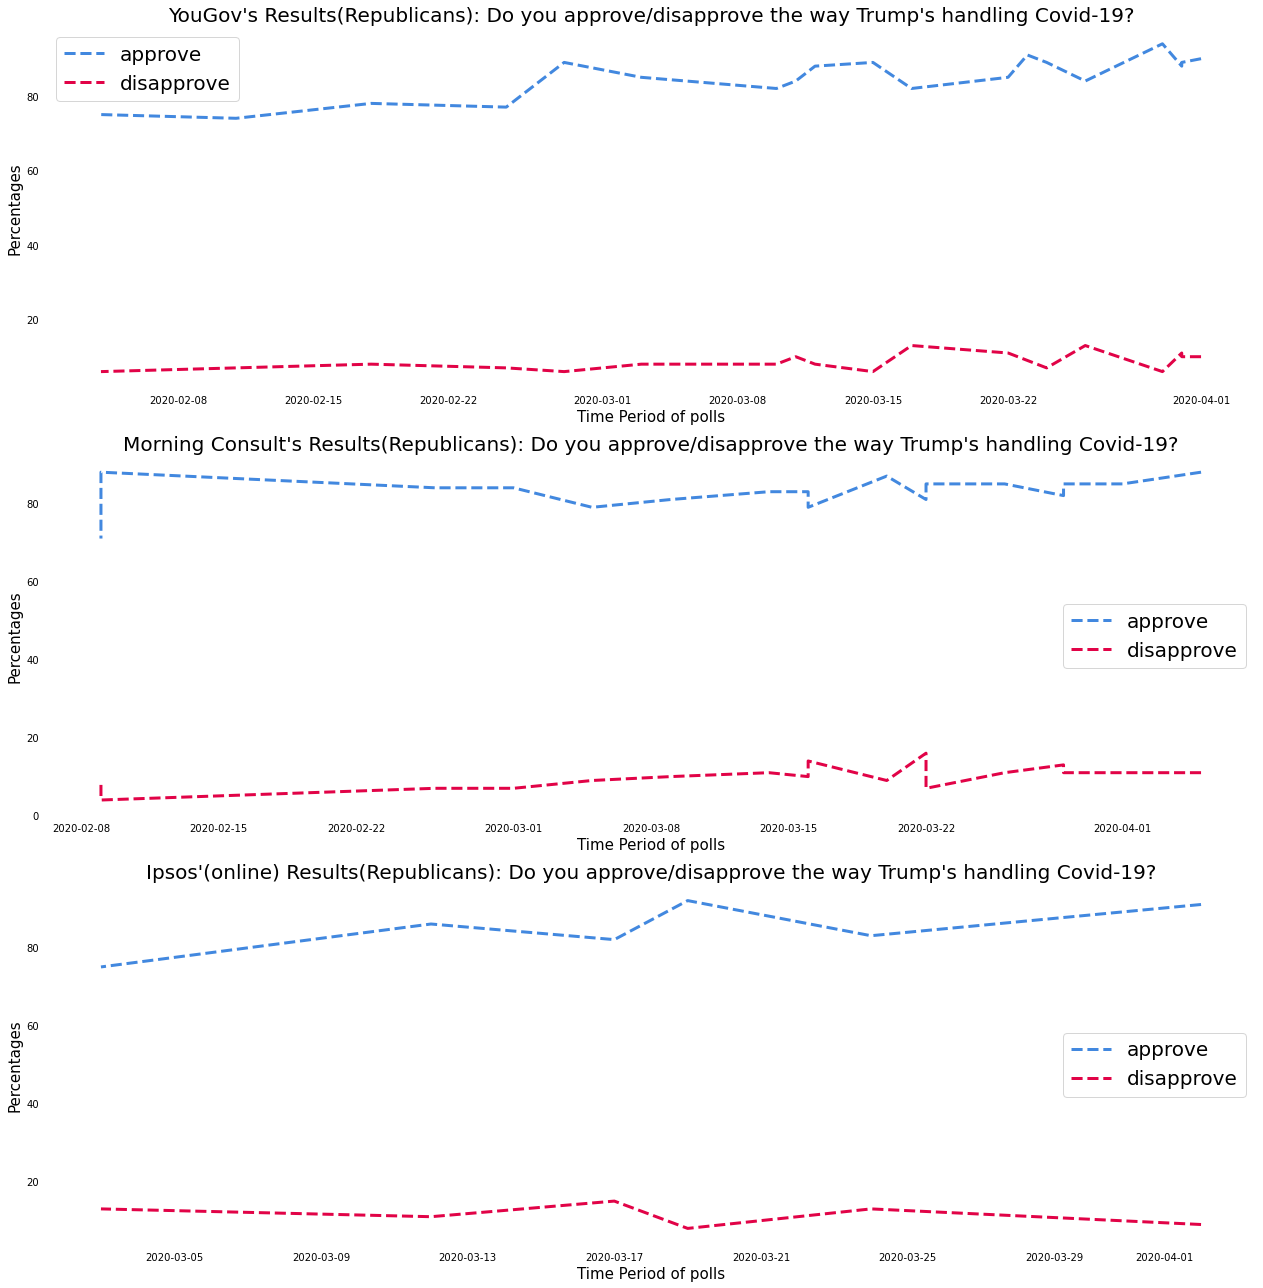

In [19]:
fig=plt.figure(figsize=(18,18))

ax7=fig.add_subplot(3,1,1)
ax8=fig.add_subplot(3,1,2)
ax9=fig.add_subplot(3,1,3)

ax7.plot(approval_r_you["end_date"],approval_r_you["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax7.plot(approval_r_you["end_date"],approval_r_you["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax7.set_title("YouGov's Results(Republicans): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax7.set_xlabel("Time Period of polls",fontsize=15)
ax7.set_ylabel("Percentages",fontsize=15)
ax7.spines["right"].set_visible(False)
ax7.spines["left"].set_visible(False)
ax7.spines["top"].set_visible(False)
ax7.spines["bottom"].set_visible(False)
ax7.tick_params(bottom=False,left=False)
ax7.legend(prop={"size":20})

ax8.plot(approval_r_mor["end_date"],approval_r_mor["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax8.plot(approval_r_mor["end_date"],approval_r_mor["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax8.set_title("Morning Consult's Results(Republicans): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax8.set_xlabel("Time Period of polls",fontsize=15)
ax8.set_ylabel("Percentages",fontsize=15)
ax8.spines["right"].set_visible(False)
ax8.spines["left"].set_visible(False)
ax8.spines["top"].set_visible(False)
ax8.spines["bottom"].set_visible(False)
ax8.tick_params(bottom=False,left=False)
ax8.legend(prop={"size":20})

ax9.plot(approval_r_ipsos["end_date"],approval_r_ipsos["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax9.plot(approval_r_ipsos["end_date"],approval_r_ipsos["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax9.set_title("Ipsos'(online) Results(Republicans): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax9.set_xlabel("Time Period of polls",fontsize=15)
ax9.set_ylabel("Percentages",fontsize=15)
ax9.spines["right"].set_visible(False)
ax9.spines["left"].set_visible(False)
ax9.spines["top"].set_visible(False)
ax9.spines["bottom"].set_visible(False)
ax9.tick_params(bottom=False,left=False)
ax9.legend(prop={"size":20})

fig.tight_layout()
plt.show()

When checking the ratios for republicans, we see that **in all three polls that republicans in general approve Trump's handling Covid-19 breakout**. In general, ratio of approval is above 70% and ratio of disapproval is below 20%. The ratios of republicans are the least fluctuating ones comparing to any other graphic in this study.

## Independents

In [20]:
approval_ind_you=approval_ind[approval_ind["pollster"]=="YouGov"]
approval_ind_mor=approval_ind[approval_ind["pollster"]=="Morning Consult"]
approval_ind_ipsos=approval_ind[approval_ind["pollster"]=="Ipsos (online)"]

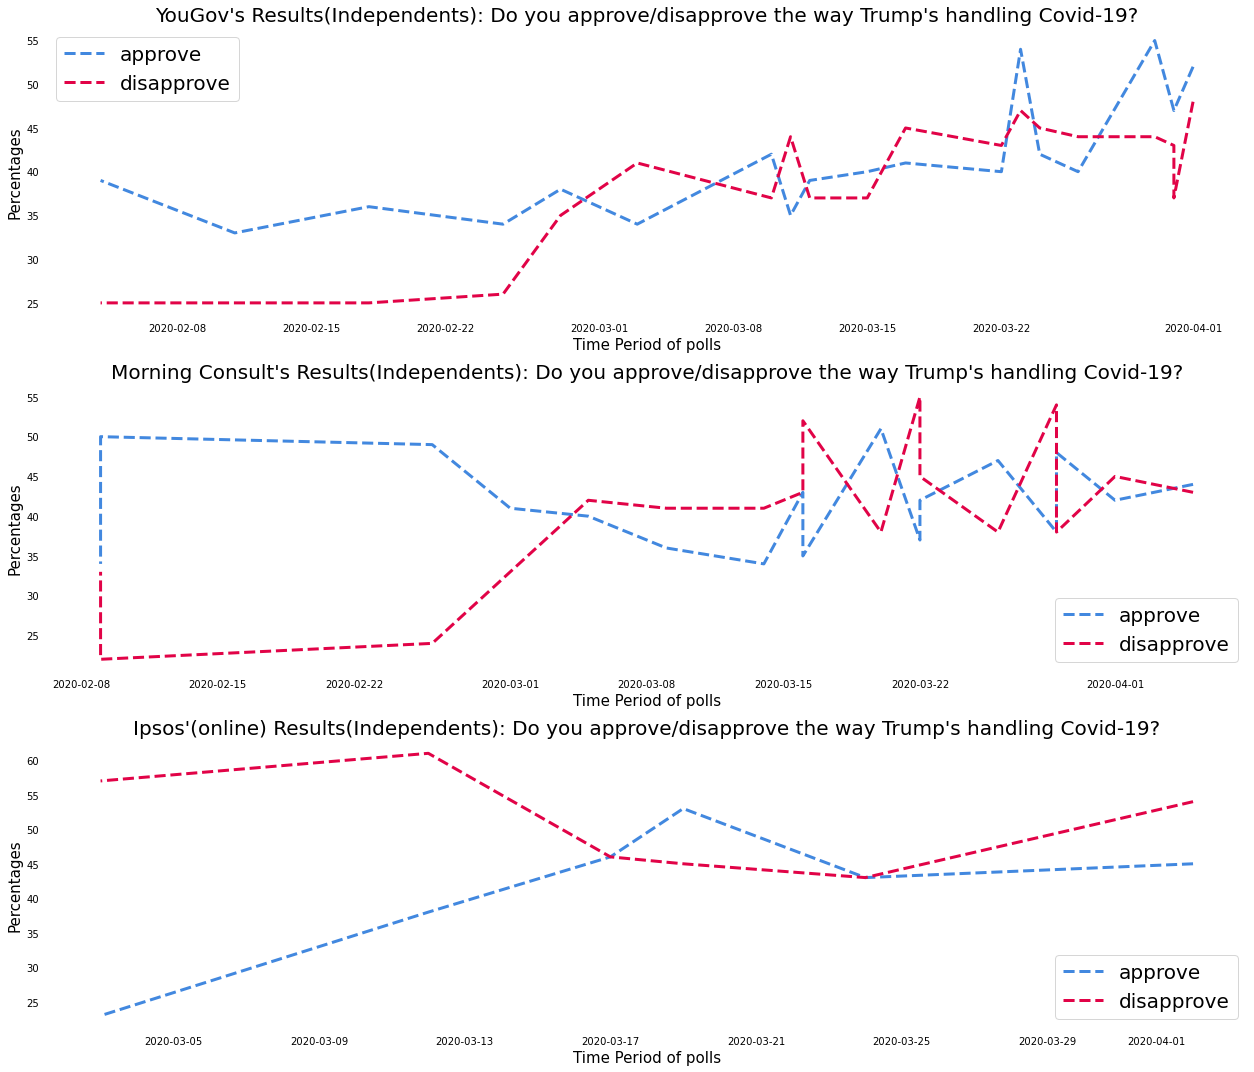

In [21]:
fig=plt.figure(figsize=(18,15))

ax10=fig.add_subplot(3,1,1)
ax11=fig.add_subplot(3,1,2)
ax12=fig.add_subplot(3,1,3)

ax10.plot(approval_ind_you["end_date"],approval_ind_you["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax10.plot(approval_ind_you["end_date"],approval_ind_you["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax10.set_title("YouGov's Results(Independents): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax10.set_xlabel("Time Period of polls",fontsize=15)
ax10.set_ylabel("Percentages",fontsize=15)
ax10.spines["right"].set_visible(False)
ax10.spines["left"].set_visible(False)
ax10.spines["top"].set_visible(False)
ax10.spines["bottom"].set_visible(False)
ax10.tick_params(bottom=False,left=False)
ax10.legend(prop={"size":20})

ax11.plot(approval_ind_mor["end_date"],approval_ind_mor["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax11.plot(approval_ind_mor["end_date"],approval_ind_mor["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax11.set_title("Morning Consult's Results(Independents): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax11.set_xlabel("Time Period of polls",fontsize=15)
ax11.set_ylabel("Percentages",fontsize=15)
ax11.spines["right"].set_visible(False)
ax11.spines["left"].set_visible(False)
ax11.spines["top"].set_visible(False)
ax11.spines["bottom"].set_visible(False)
ax11.tick_params(bottom=False,left=False)
ax11.legend(prop={"size":20})

ax12.plot(approval_ind_ipsos["end_date"],approval_ind_ipsos["approve"],linewidth=3,color="#4288DF",label="approve",linestyle="--")
ax12.plot(approval_ind_ipsos["end_date"],approval_ind_ipsos["disapprove"],linewidth=3,color="#E10347",label="disapprove",linestyle="--")
ax12.set_title("Ipsos'(online) Results(Independents): Do you approve/disapprove the way Trump's handling Covid-19?",fontsize=20)
ax12.set_xlabel("Time Period of polls",fontsize=15)
ax12.set_ylabel("Percentages",fontsize=15)
ax12.spines["right"].set_visible(False)
ax12.spines["left"].set_visible(False)
ax12.spines["top"].set_visible(False)
ax12.spines["bottom"].set_visible(False)
ax12.tick_params(bottom=False,left=False)
ax12.legend(prop={"size":20})

fig.tight_layout()
plt.show()

## Conclusion

This analysis has shown that through the selected periods, the majority of Republicans (above 80% of them, at least) approved Trump's dealing with Covid-19 and the ratio is hardly fluctuating. Republicans who disapprove his way of conducting this crisis  are less than 10% in this class. The common opinion amongst republicans seems really good, but suspicious. **Do they approve Donald Trump's handling the breakout because the right actions were taken, or is it because they share the same political view and this is their absolute support for him?** Unfortunately this analysis can not reveal further information upon the subject.

As for the graphics of Democrats, it can be said that it's sort of similar to the graphics of Republicans, in an opposite way. The majority doesn't approve Donald Trump's actions against Covid-19. Again, one could think that rather than the actions he took for this virus, the political views of participants play role in their viewing the process. However, the ratios are not as sharp as in the Republicans' graphics. Generally speaking, the percentage of Democrats approving Donald Trump's handling Covid-19 is higher than Republicans' disapproving it.

In summary, even though the question was whether to approve or disapprove Donald Trump's handlind Covid-19 issue, the participants might have put other aspects into their evaluation when answering this question so results are highly affected by the parties that participants belong to.